In [11]:
%matplotlib inline
import pandas as pd
import dataset

In [4]:
urls = [
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-01.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-02.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-03.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-04.csv.gz',
    'http://beehive1.mcs.anl.gov/datasets/2/001e0610ba89/2017-10-05.csv.gz',
]

df = pd.concat([dataset.load_from_url(url) for url in urls])
df.head()

,APDS-9006-020.intensity,BMI160.acceleration.x,BMI160.acceleration.y,BMI160.acceleration.z,BMI160.index,BMI160.orientation.x,BMI160.orientation.y,BMI160.orientation.z,BMP180.pressure,BMP180.temperature,...,SHT25.temperature,SO2/H2S Temp.adc_temperature,SPV1840LR5H-B.intensity,Si1145.intensity,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
2017-10-01 00:00:16,97.0,-81.0,979.0,106.0,0.0,0.0,10.0,-11.0,83458.0,16.40,...,1794.0,1853.0,818.0,27956.0,16.71,25.56,574.0,22261.0,21137.0,16.89
2017-10-01 00:00:40,99.0,-77.0,978.0,98.0,0.0,0.0,11.0,-11.0,83452.0,16.30,...,1782.0,1853.0,819.0,27956.0,16.62,25.43,591.0,22260.0,21136.0,16.77
2017-10-01 00:01:04,102.0,-94.0,978.0,63.0,0.0,0.0,8.0,-11.0,83456.0,16.20,...,1771.0,1853.0,819.0,27956.0,16.53,25.31,606.0,22259.0,21135.0,16.66
2017-10-01 00:01:28,106.0,-140.0,979.0,84.0,0.0,0.0,10.0,-11.0,83457.0,16.14,...,1760.0,1826.0,819.0,27956.0,16.44,25.13,619.0,22258.0,21135.0,16.61
2017-10-01 00:01:52,109.0,-104.0,978.0,70.0,0.0,0.0,10.0,-11.0,83454.0,16.11,...,1753.0,1826.0,819.0,27956.0,16.43,25.06,633.0,22258.0,21133.0,16.57


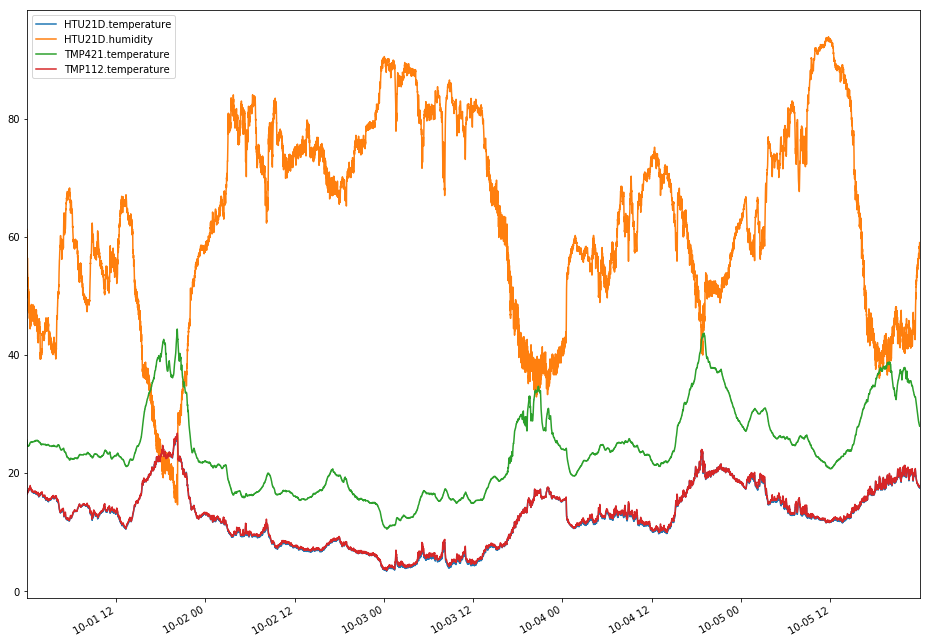

In [12]:
df[['HTU21D.temperature',
    'HTU21D.humidity',
    'TMP421.temperature',
    'TMP112.temperature',
    ]].plot(figsize=(16, 12))